In [1]:
#Import Clustering libraries
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime=pd.read_csv("crimedata.csv")

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
crime1=crime.copy()
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:
crime1=crime1.drop("Unnamed: 0",axis=1)

In [9]:
crime1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# Data Visualisation

<Axes: >

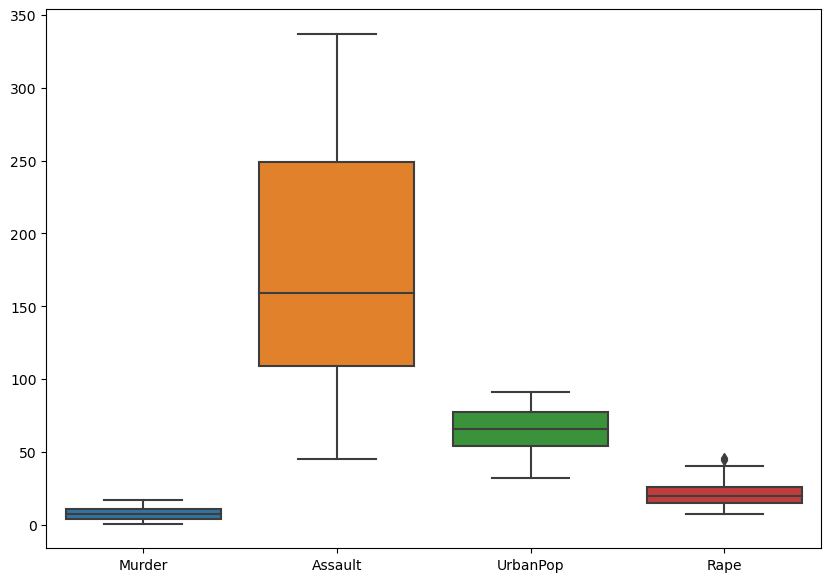

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(data=crime1)

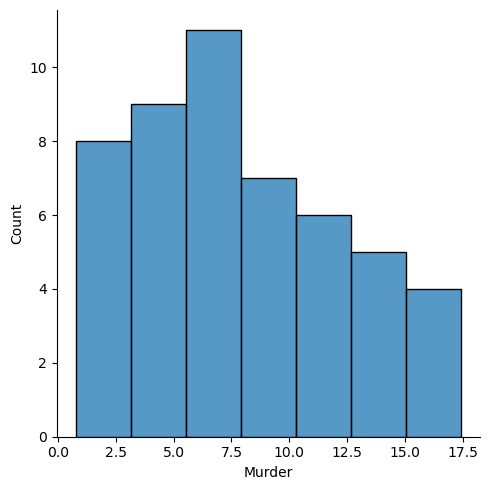

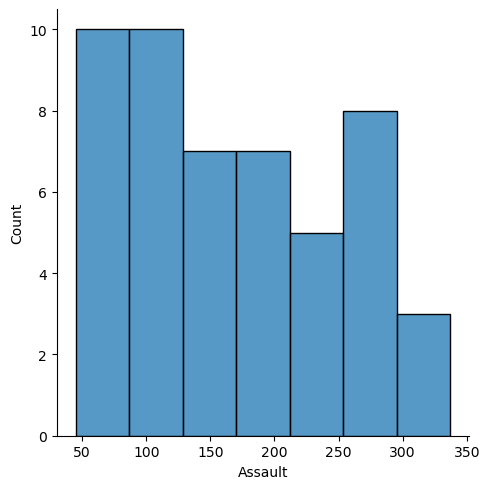

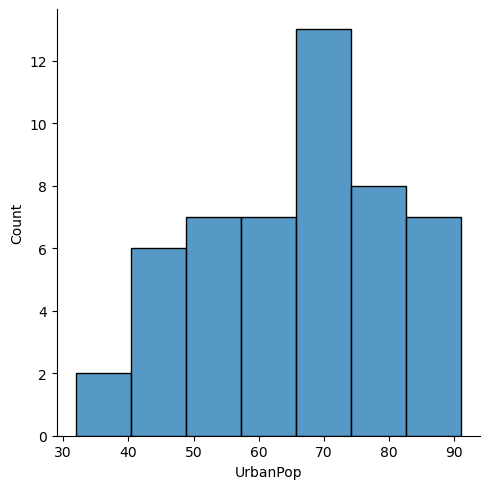

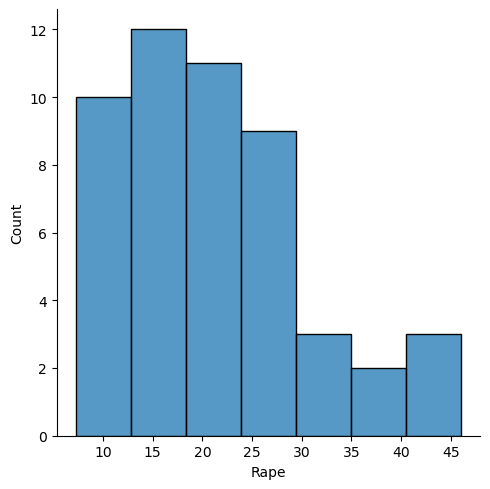

In [11]:
for i in crime1.columns:
    sns.displot(crime1[i])

In [12]:
#Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [13]:
#Normalized data frame (considering the numerical part of data)
df_norm=norm_func(crime1.iloc[:,:])

In [14]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Finding the optimal number of clusters

In [16]:
from sklearn.cluster import KMeans

nc=[2,3,4,5,6,7,8,9]
iner=[]
for i in nc:
    km=KMeans(i)
    km.fit(df_norm.iloc[:,:4])
    iner.append(km.inertia_)

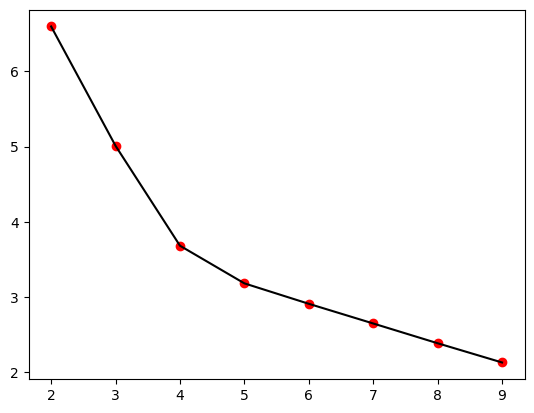

In [17]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# Silhouette_score

In [18]:
from sklearn.metrics import silhouette_score as sil

In [19]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="complete")
    
    y=hc.fit_predict(df_norm.iloc[:,:4])
    sc_score.append(sil(df_norm.iloc[:,:4],y))

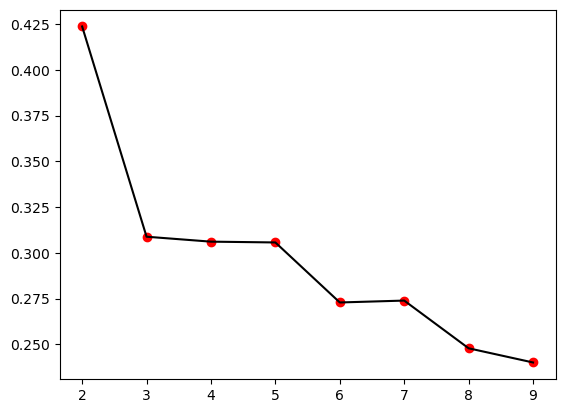

In [20]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [21]:
sc_score

[0.42364457559625074,
 0.30877213909512063,
 0.30607294424263076,
 0.3056360903608855,
 0.27284356597794224,
 0.2738764216820654,
 0.24780604916967516,
 0.24005511661723847]

# Hierarchical

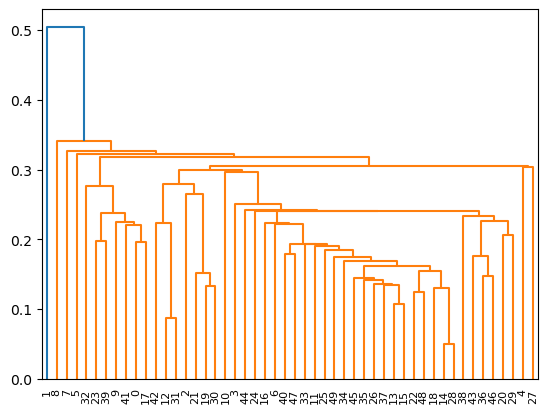

In [22]:
# Create dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="single"))

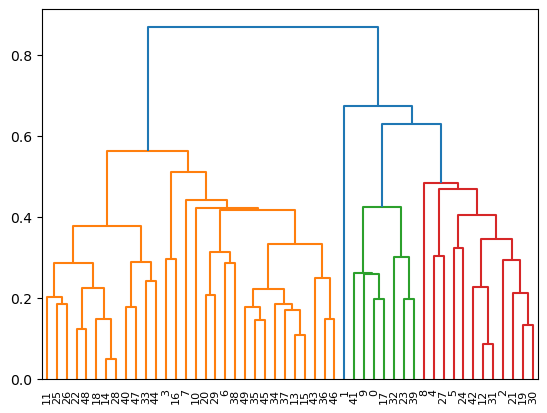

In [23]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="average"))

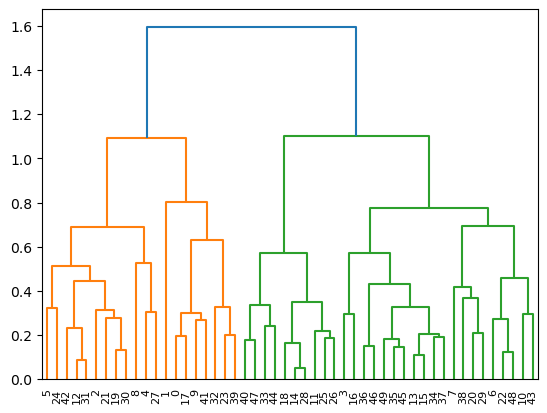

In [24]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="complete"))

In [25]:
#create clusters
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

In [26]:
#save clusters for chart
y_hc=hc.fit_predict(df_norm)
h_Clusters=pd.DataFrame(y_hc,columns=['h_Clusters'])

In [30]:
h_Clusters

,h_Clusters
0,3
1,0
2,0
3,4
4,0
5,0
6,1
7,1
8,0
9,3


In [32]:
crime["h_Clusters no"]=h_Clusters
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_Clusters no
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


# K Means

In [33]:
crimek=pd.read_csv("crimedata.csv")

In [34]:
df_norm=norm_func(crimek.iloc[:,1:])

In [35]:
from sklearn.cluster import KMeans

In [36]:
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [37]:
model_kmeans.labels_

array([2, 1, 1, 4, 1, 1, 3, 4, 1, 2, 3, 0, 1, 4, 0, 4, 4, 2, 0, 1, 3, 1,
       0, 2, 4, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 4, 4, 3, 3, 2, 0, 2, 1, 3,
       0, 4, 3, 0, 0, 4])

In [38]:
crimek["labels"]=pd.Series(model_kmeans.labels_)

In [39]:
crimek

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


<Axes: >

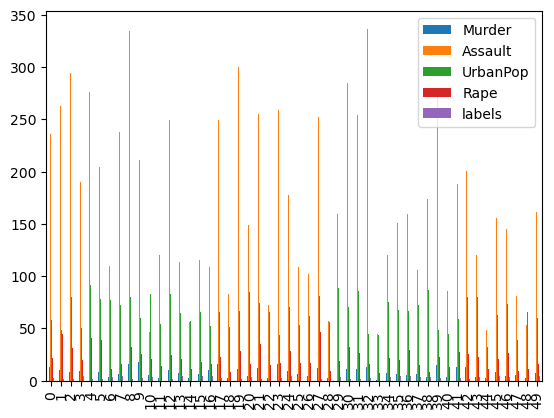

In [40]:
crimek.plot(kind="bar")

In [41]:
crimek.groupby(["labels"])["Unnamed: 0"].apply(lambda x:tuple(x))

labels
0    (Idaho, Iowa, Maine, Minnesota, Montana, Nebra...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Alabama, Georgia, Louisiana, Mississippi, Nor...
3    (Connecticut, Hawaii, Massachusetts, New Jerse...
4    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
Name: Unnamed: 0, dtype: object

In [42]:
crimek[crimek["Unnamed: 0"].isin(["Missouri","Louisiana"])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
17,Louisiana,15.4,249,66,22.2,2
24,Missouri,9.0,178,70,28.2,4


# DBSCAN

In [43]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [49]:
from sklearn.datasets import make_moons
x,y=make_moons(100)
data=pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,0.595217,-0.414413,1
1,-0.949056,0.315108,0
2,1.801414,-0.098111,1
3,1.032052,-0.499486,1
4,0.159600,0.987182,0


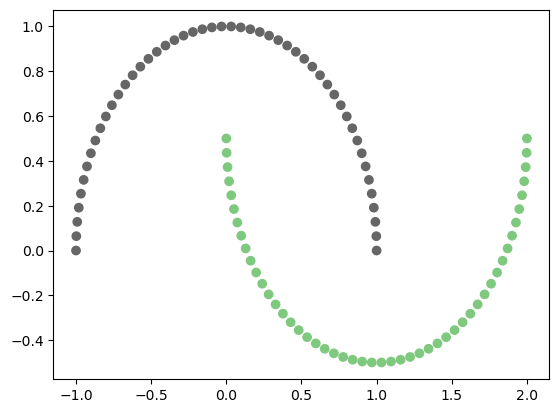

In [50]:
dbs=DBSCAN(min_samples=4,eps=0.2)
db_cluster=dbs.fit_predict(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=db_cluster,cmap=plt.cm.Accent)

In [51]:
db_cluster

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)